# Práctica 1

Práctica 1 <a href="https://campus.exactas.uba.ar/pluginfile.php/304400/course/section/38568/practica1.pdf">PDF</a>

Repo Honi <a href="https://github.com/honi/uba-probabilidad-y-estadistica">Github</a>

In [1]:
import numpy as np
import random
from IPython.display import Latex
from math import factorial
def nCr(n: int, r: int):
    return factorial(n) // (factorial(r) * factorial(n - r))

## Ejercicio 1

Se arroja dos veces un dado equilibrado, registrándose los resultados obtenidos.

### Pregunta A

Definición del espacio muestral:

$\Omega = \{(x,y) \in \mathbb{N} \textrm{ / }x \in \{1,2,...,6\}, y \in \{1,2,...,6\}\}$

In [51]:
O = set((x, y) for x in range(1,7) for y in range(1,7))

### Pregunta B

Describir el conjunto de elementos del espacio muestral que satisface que:

a) La suma de los dos números obtenidos es por lo menos 5

$ A = \{(x,y) \in \mathbb{N}^2 \textrm{ / } x+y \geq 5 \}$

In [52]:
A = set((x,y) for (x,y) in O if x+y >= 5)

b) El valor obtenido en el primer tiro es superior al obtenido en el segundo

$ B = \{(x,y) \in \mathbb{N}^2 \textrm{ / } x > y\}$

In [53]:
B = set((x,y) for (x,y) in O if x>y)

c) El valor obtenido en el primer tiro es un 4

$C = \{(x,y) \in \mathbb{N}^2 \textrm{ / } x = 4\} $

In [54]:
C = set((x,y) for (x,y) in O if x == 4)

### Pregunta C

Calcular las probabilidades de los eventos definidos en 1b).

$ P(A) = \frac{\#A}{\#O} $

In [55]:
cant_A = len(A)
cant_O = len(O)
prob_A = cant_A/cant_O
print("Probabilidad estimada de A: {}".format(prob_A))

Probabilidad estimada de A: 0.8333333333333334


$ P(B) = \frac{\#B}{\#O} $

In [56]:
cant_B = len(B)
prob_B = cant_B/cant_O
print("Probabilidad estimada de B: {}".format(prob_B))

Probabilidad estimada de B: 0.4166666666666667


d) Simular el experimento de tirar dos veces un dado equilibrado

$ P(C) = \frac{\#C}{\#O} $

In [57]:
cant_C = len(C)
prob_C = cant_C/cant_O
print("Probabilidad estimada de C: {}".format(prob_C))

Probabilidad estimada de C: 0.16666666666666666


### Pregunta D

Simular en R (python) el experimento de tirar dos veces un dado equilibrado.

In [58]:
random.choice(tuple(O))

(4, 5)

### Pregunta E

Simular 1000 veces en R (python) el experimento de tirar dos veces un dado equilibrado y
estimar las probabilidades de los sucesos defnidos en 1b).

In [59]:
countA = 0
countB = 0
countC = 0
for x in range(1000):
    result = random.choice(tuple(O))
    if (result[0] + result[1]) >= 5:
        countA += 1
    if result[0] > result[1]:
        countB += 1
    if result[0] == 4:
        countC += 1

print("Probabilidad de A luego de 1000 simulaciones: {} vs. esperado {}".format(countA/1000, round(5/6, 4)))
print("Probabilidad de B luego de 1000 simulaciones: {} vs. esperado {}".format(countB/1000, round(5/12, 4)))
print("Probabilidad de C luego de 1000 simulaciones: {} vs. esperado {}".format(countC/1000, round(1/6, 4)))

Probabilidad de A luego de 1000 simulaciones: 0.851 vs. esperado 0.8333
Probabilidad de B luego de 1000 simulaciones: 0.411 vs. esperado 0.4167
Probabilidad de C luego de 1000 simulaciones: 0.162 vs. esperado 0.1667


### Pregunta F

Describir los siguientes conjuntos:

$ A \cap B = \{(x,y) \in \mathbb{N}^2 \textrm{ / } (x > y) \land (x+y \geq 5)\} $ 
    

In [60]:
R = set((x,y) for (x,y) in O if x>y and x+y>=5)
R == A.intersection(B)

True

$ B \cup C = \{(x,y) \in \mathbb{N}^2 \textrm{ / } (x > y) \lor (x = 4)\} $

In [61]:
S = set((x,y) for (x,y) in O if x>y or x==4)
S == B.union(C)

True

$ A \cap (B\cup C) = \{(x,y) \in \mathbb{N}^2 \textrm{ / } (x + y \geq 5) \land (x,y) \in S\}$

In [62]:
T = set((x,y) for (x,y) in O if x+y>=5 and (x,y) in S)
T == A.intersection(B.union(C))

True

### Pregunta G

Calcular las probabilidades de los sucesos definidos en 1f ).

$ P(A\cap B) = \frac{\#A\cup B}{\#O}$

In [74]:
PR = len(R) / len(O)
PR

0.3611111111111111

$ P(B\cup C) = \frac{\#B\cup C}{\#O}$

In [75]:
PS = len(S) / len(O)
PS

0.5

$ P(A\cap (B\cup C)) = \frac{\#(A\cap (B\cup C))}{\#O}$

In [78]:
PT = len(T) / len(O)
PT

0.4444444444444444

### Pregunta H

Estimar las probabilidades de los sucesos denidos en 1f ) mediante simulaciones.
Comparar con los resultados obtenidos en 1g).

In [83]:
AinB = 0
BunC = 0
AinBunC = 0
for x in range(1000):
    result = random.choice(tuple(O))
    pa = result[0] + result[1] >= 5 
    pb = result[0] > result[1]
    pc = result[0] == 4
    if pa and pb:
        AinB += 1
    if pb or pc:
        BunC += 1
    if pb and (pb or pc):
        AinBunC += 1

print("Probabilidad de A&B luego de 1000 simulaciones: {} vs. esperado {}".format(AinB/1000, round(PR, 4)))
print("Probabilidad de BUC luego de 1000 simulaciones: {} vs. esperado {}".format(BunC/1000, round(PS, 4)))
print("Probabilidad de A&(BUC) luego de 1000 simulaciones: {} vs. esperado {}".format(AinBunC/1000, round(PT, 4)))
    
    

Probabilidad de A&B luego de 1000 simulaciones: 0.34 vs. esperado 0.3611
Probabilidad de BUC luego de 1000 simulaciones: 0.49 vs. esperado 0.5
Probabilidad de A&(BUC) luego de 1000 simulaciones: 0.405 vs. esperado 0.4444


## Ejercicio 2

a) Dados dos eventos A y B tales que se conocen $ P (A\cup B)$ y $P (A \cap B)$, hallar una
fórmula para la probabilidad de que ocurra exactamente uno de estos eventos.

**Solución:**

Sea C el evento definido como "ocurre A o B pero no ambas a la vez", se tiene:

$ P(C) = P(A\cup B) - P(A\cap B) $

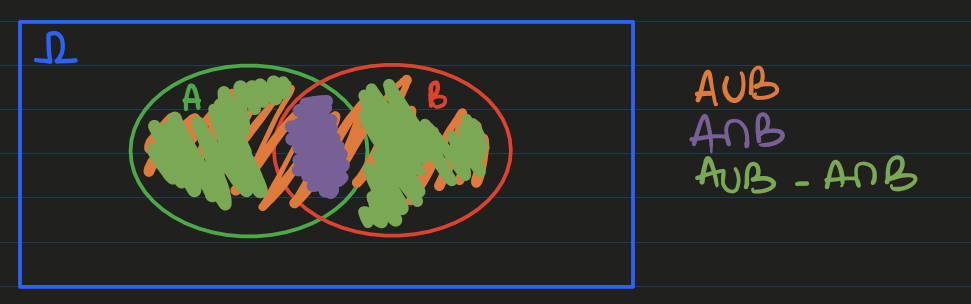

b) Una compañía constructora trabaja en dos proyectos diferentes. Sea A el evento:
"el primero de los proyectos se termina en la fecha del contrato" y definamos
análogamente B para el segundo proyecto. Si $ P(A\cup B) = 0.9 $ y $P(A \cap B) = 0.5$,


¿cuál es la probabilidad de que exactamente un proyecto se termine para la fecha
de contrato?

**Solución:**

Sea C el evento definido como "ocurre A o B pero no ambas a la vez", se tiene:

$ P(C) = P(A\cup B) - P(A\cap B) = 0,9 - 0,5 = 0,4$

## Ejercicio 3

Supongamos que cuando una computadora se "cuelga" (no responde), el 75% de las
veces se debe a problemas de memoria y el 15% de las veces a problemas de software y
que el 15% de las veces se debe a problemas que no son ni de memoria ni de software.
Si una computadora se cuelga,

### Pregunta A

¿cuál es la probabilidad de que estos dos problemas ocurran simultáneamente?

**Solución:**

Sea el espacio muestral $\Omega :\{\textrm{"Computadoras que se cuelgan"}\}$

Definimos:
<ul>
    <li><b>M</b>:"La computadora tiene problemas de memoria"</li>
    <li><b>S</b>:"La computadora tiene problemas de Software"</li>
    <li><b>O</b>:"La computadora tiene otros problemas"</li>
</ul>

Con probabilidades dadas por enunciado:<br>
$
\begin{align*}
\\&P(M) = 0,75 
\\&P(S) = 0,15 
\\&P(O) = 0,15
\end{align*}$

Ahora $ M\cap S $ resulta: *la computadora tinen problemas de memoria y software simultáneamente* como pide el ejercicio. Queda calcular $ P(M\cap S) $

Partimos de $ P(M\cup S)$ y operamos hasta encontrar $ P(M\cap S) $

$
\begin{align*}
P(M\cup S) &= P(M) + P(S) - P(M\cap S)\\
\iff P(M\cap S) &=  P(M) + P(S) - P(M\cup S)\\
\iff P(M\cap S) &=  P(M) + P(S) - (1-P(M\cup S)^c)\\
\iff P(M\cap S) &=  P(M) + P(S) - (1-P(O))\\
\iff P(M\cap S) &=  0,75 + 0,15 - (1-0,15)\\
\iff P(M\cap S) &=  0,05\\
\end{align*}
$



### Pregunta B

¿Cuál es la probabilidad de que ocurra un problema de software y no de memoria?

**Solución:**

Podemos graficar en un diagrama de Venn lo que nos piden:


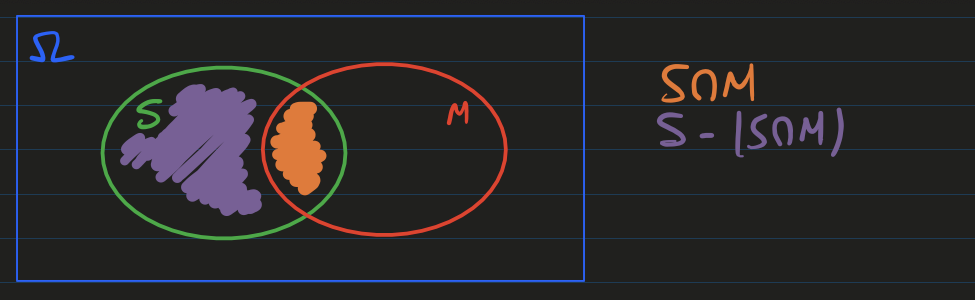

Luego:

$
\begin{align*}
P(S-M) &= P(S) - P(S\cap M)\\
\iff P(S-M) &= 0,15 - 0,05\\
\iff P(S-M) &= 0,10\\
\end{align*}$

##  Ejercicio 4

De un bolillero que contiene 5 bolillas numeradas 1, 2, 3, 4, 5 se extrae una al azar, sea
la número k. Se eliminan las bolillas cuyo número es mayor que k de la urna y se hace
una segunda extracción al azar entre las bolillas 1 a k, sea la número j. Se eliminan
las bolillas cuyo número es mayor que j de la urna y se hace una tercera extracción al
azar entre las bolillas 1 a j.

### Pregunta A

Describir un espacio muestral adecuado para este experimento y determinar el número de elementos que posee.

**Solución:**

Al momento de definir un espacio muestral, se intenta lograr que los elementos del mismo sean equiprobables, muchas veces esto no es posible.

Definimos:

$\Omega = \{(x,y,z) \in \mathbb{N}^3 \textrm{ / } z \leq j \leq y \leq k \leq x \leq 5\}$

Donde cada vector triple indica la bolilla que se extrae en la primera, segunda y tercera extracción.

In [6]:
# Creación de Omega
O = set((x,y,z) for x in range(1,6) for y in range(1,x+1) for z in range(1,y+1))
O

{(1, 1, 1),
 (2, 1, 1),
 (2, 2, 1),
 (2, 2, 2),
 (3, 1, 1),
 (3, 2, 1),
 (3, 2, 2),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3),
 (4, 1, 1),
 (4, 2, 1),
 (4, 2, 2),
 (4, 3, 1),
 (4, 3, 2),
 (4, 3, 3),
 (4, 4, 1),
 (4, 4, 2),
 (4, 4, 3),
 (4, 4, 4),
 (5, 1, 1),
 (5, 2, 1),
 (5, 2, 2),
 (5, 3, 1),
 (5, 3, 2),
 (5, 3, 3),
 (5, 4, 1),
 (5, 4, 2),
 (5, 4, 3),
 (5, 4, 4),
 (5, 5, 1),
 (5, 5, 2),
 (5, 5, 3),
 (5, 5, 4),
 (5, 5, 5)}

In [7]:
len(O)

35

###  Pregunta B

¿Es razonable suponer equiprobabilidad en este espacio?

**Solución:**

Ni $\Omega_1 $ ni $\Omega_2 $ son equiprobables, no todos sus elementos tienen la misma probabilidad de ocurrencia dada la naturaleza del experimento.

Si en la primera extracción sale la bolilla 1, no se pueden realizar más extracciones, por lo que es imposible encontrar un $ x \in \Omega_1 = (1,2,3) \textrm{ o } (1,4,3) $.

De la misma forma, es imposible encontrar un $ y \in \Omega_2 = (0,0,2,1,3) $ pues extraída la bolilla 4 en primer lugar, elimina todas las mayores a 4 (en este caso la 5ta) y por lo tanto no puede salir la bolilla 5 en la tercer extracción.

¿Qué probabilidad le asignaría al (3,2,1)?

**Solución:**

Sean:
<ul>
    <li>A : "Sacar 3 en la primer extracción"</li>
    <li>B : "Sacar 2 en la segunda extracción"</li>
    <li>C : "Sacar 1 en la tercer extracción"</li>
</ul>

$
\begin{align*}
P(A) &= \frac{1}{5}\\
P(B) &= \frac{1}{5-2} = \frac{1}{3}\\
P(C) &= \frac{1}{3-1} = \frac{1}{2}\\
\end{align*}$

Por lo tanto:

$P(3,2,1) = P(A).P(B).P(C) =\frac{1}{5.3.2} = \frac{1}{30} $

De donde se puede ver que la probabilidad de ocurrencia de un suceso $P(x, y, z) = \frac{1}{5*y*z}$ Así podemos chequear que que la suma de los elementos de O calculado anteriormente suma 1.


In [14]:
# Suma de las probabilidades de ocurrencia de los elementos de O
from fractions import Fraction
float(sum([Fraction(1, 5*k*j) for k, j, i in O]))

1.0

## Ejercicio 5

Una firma proveedora de software ha ofrecido sus servicios a 3 empresas. Se definen los
eventos $A_i = \{\textrm{"la empresa i realiza una compra a esta firma"}\}$ ; para $i = 1, 2, 3$. Se sabe
que

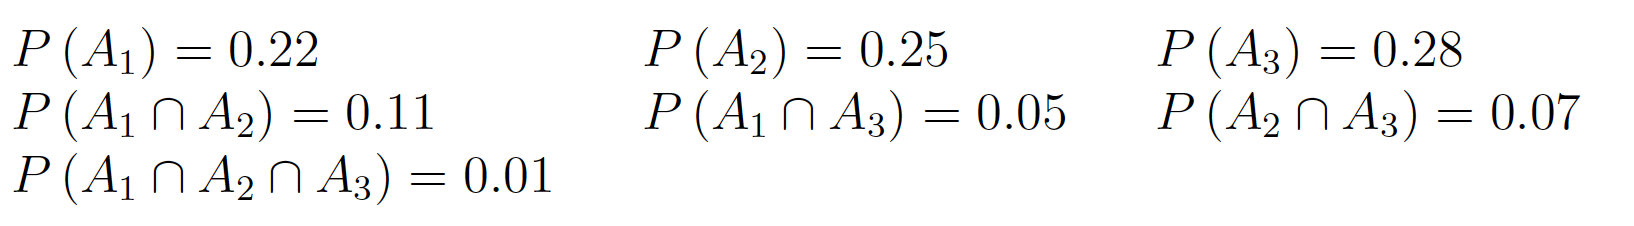

Expresar en palabras los siguientes eventos y calcular sus probabilidades:

**Solución:**

###  Evento A

$ A_1 \cup A_2 $


**Definición:** La empresa 1 o la empresa 2 compran.

$
\begin{align*}
P(A_1 \cup A_2) &= P(A_1) + P(A_2) - P(A_1\cap A_2)\\
\iff P(A_1 \cup A_2) &= 0,22 + 0,25 - 0,11 \\
\iff P(A_1 \cup A_2) &= 0,36 \\
\end{align*}$

###  Evento B

$ A_1^c \cup A_2^c $

**Definición:** Las empresa 1 no compra y la empresa 2 no compra.

$
\begin{align*}
P(A_1^c \cup A_2^c) &= P(A_1 \cup A_2)^c \\
\iff P(A_1^c \cup A_2^c) &= 1-P(A_1 \cup A_2) \\
\iff P(A_1^c \cup A_2^c) &= 1-0,36 \\
\iff P(A_1^c \cup A_2^c) &= 0,64 \\
\end{align*}$

###  Evento C

$ A_1 \cup A_2 \cup A_3 $

**Definición:** La empresa 1 o la empresa 2 o la empresa 3 compra(n).


Graficamente vemos que haciendo la suma de las probabilidades de los tres conjuntos, sumamos dos veces las intersecciones, por lo que debemos restarlas.

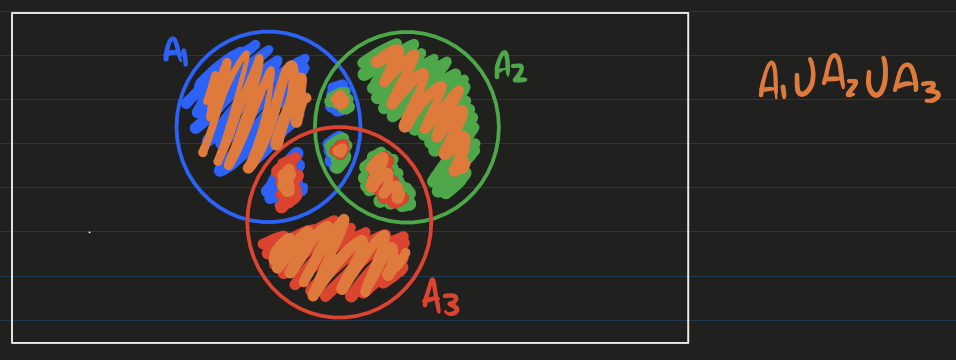

$
\begin{align*}
P(A_1 \cup A_2 \cup A_3) &= P(A_1) + P(A_2) + P(A_3) - P(A_1 \cap A_2) - P(A_1 \cap A_3) - P(A_2 \cap A_3) + P(A_1 \cap A_2 \cap A_3)\\
\iff P(A_1 \cup A_2 \cup A_3) &= 0,22 + 0,25 + 0,28 - 0,11 - 0,05 - 0,07 + 0,01\\
\iff P(A_1 \cup A_2 \cup A_3) &= 0,53\\
\end{align*}$

###  Evento D

$ A_1^c \cap A_2^c \cap A_3^c $

**Definición:** Ninguna empresa compra.

Por DeMorgan: $ A_1^c \cap A_2^c \cap A_3^c = (A_1 \cup A_2 \cup A_3)^c $

$
\begin{align*}
P(A_1^c \cap A_2^c \cap A_3^c) &= P(A_1 \cup A_2 \cup A_3)^c)\\
\iff P(A_1^c \cap A_2^c \cap A_3^c) &= 1-P(A_1 \cup A_2 \cup A_3)\\
\iff P(A_1^c \cap A_2^c \cap A_3^c) &= 1-0,53\\
\iff P(A_1^c \cap A_2^c \cap A_3^c) &= 0,47\\
\end{align*}$

###  Evento E

$ A_1^c \cap A_2^c \cap A_3 $

**Definición:** Solo compra la empresa 3

$
\begin{align*}
P(A_1^c \cap A_2^c \cap A_3) &= P((A_1 \cup A_2)^c \cap A_3)\\
\iff P(A_1^c \cap A_2^c \cap A_3) &= P(A_3)-P(A_1 \cup A_2)\\
\iff P(A_1^c \cap A_2^c \cap A_3) &= P(A_3)-P(A_3 \cap A_1) - P(A_3 \cap A_2) + P(A_1 \cap A_2 \cap A_3)\\
\iff P(A_1^c \cap A_2^c \cap A_3) &= 0,28 - 0,05 - 0,07 + 0,01\\
\iff P(A_1^c \cap A_2^c \cap A_3) &= 0,17\\
\end{align*}$

###  Evento F

$ (A_1^c \cap A_2^c) \cup A_3 $

**Definición:** No compra la empresa 1 y no compra la empresa 2 o compra la empresa 3

$
\begin{align*}
P(A_1^c \cap A_2^c) \cup A_3) &= P((A_1 \cup A_2)^c) + P(A_3) - P((A_1^c \cap A_2^c) \cap A_3)\\
\iff P(A_1^c \cap A_2^c) \cup A_3) &= 1-0,36 +0,28 -0,17\\
\iff P(A_1^c \cap A_2^c) \cup A_3) &= 0,75\\
\end{align*}$



##  Ejercicio 6

Un grupo de 60 alumnos será subdividido al azar en dos divisiones de 30 alumnos cada
una. Cinco de esos alumnos son muy amigos.: Alicia, Beto, Carmen, Diego y Eva.

### Pregunta A

¿Cuál es la probabilidad de que todos queden en la misma división?

**Solución:**

Si definimos el espacio muestral como:

$ \Omega = \{ (x_1, x_2, ..., x_{60}) \textrm{ / } x_i \in \{1,2 \}, 1\leq i \leq 60\} $

Donde cada vector es una posible distribución de los alumnos.

Ahora si queremos que 5 elementos de 60 tengan el mismo valor, definimos

A = "Los cinco alumos están en el mismo curso"

Y dado que el experimento es aleatorio y nuestro espacio muestral es equiprobable, se define

$
\begin{align*}
P(A) &= \frac{P(A)}{P(\Omega)}\\
\iff P(A) &= \frac{\#A}{\#\Omega}\\
\iff P(A) &= 2.\frac{\binom{55}{25}}{\binom{60}{60}}\\
\iff P(A) &= 0,52\\
\end{align*}$


In [3]:
2 * nCr(55,25) / nCr(60,30)

0.052185548617305975

###  Pregunta B

¿Cuál es la probabilidad de que sólo quede separado Diego?

**Solución:**

Queremos que 4 alumnos queden en un grupo y el quinto en el otro. Definimos:

B = "Diego queda en otro grupo"

$
\begin{align*}
P(B) &= \frac{P(B)}{P(\Omega)}\\
\iff P(A) &= \frac{\#B}{\#\Omega}\\
\iff P(A) &= 2.\frac{\binom{55}{26}}{\binom{60}{30}}\\
\iff P(A) &= 0,060\\
\end{align*}$

In [6]:
2 * nCr(55,26) / nCr(60,30)

0.06021409455842997